In [1]:
import sys
sys.path.insert(1, '../../unseen')

import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fileio

In [48]:
cafe_files = ['/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19930501/atmos_isobaric_daily.zarr.zip',
              '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19931101/atmos_isobaric_daily.zarr.zip',
              '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19940501/atmos_isobaric_daily.zarr.zip',
              '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19941101/atmos_isobaric_daily.zarr.zip']

In [49]:
ds = fileio.open_mfforecast(cafe_files,
                            variables=['tasmax'],
                            spatial_coords=[47.45, 237.69],
                            units={'tasmax': 'C'},
                            metadata_file='../../config/dataset_cafe_daily.yml',
                            input_freq='D',
                            no_leap_days=True,
                           )

In [50]:
ds = ds.compute()

In [51]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 4, lead_time: 3650)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * init_date  (init_date) object 1993-05-01 00:00:00 ... 1994-11-01 00:00:00
    time       (lead_time, init_date) object 1993-05-01 12:00:00 ... 2004-10-...
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 10.27 12.52 ... 12.71
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

In [55]:
clim = ds.groupby('init_date.month').mean(['ensemble', 'init_date'])

In [56]:
clim

<xarray.Dataset>
Dimensions:    (lead_time: 3650, month: 2)
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * month      (month) int64 5 11
Data variables:
    tasmax     (month, lead_time) float32 12.94 12.13 12.12 ... 6.822 6.693

TODO: Figure out how to line up the observational climatology (repeated 10 times) with this.

The rest below is things I tried but were wrong...

In [11]:
dayofyear = ds['time'].dt.dayofyear
leadyear = ds['time'].dt.year - ds['time'].dt.year[0, 0]

In [12]:
dayofyear

<xarray.DataArray 'dayofyear' (lead_time: 3650, init_date: 2)>
array([[121, 305],
       [122, 306],
       [123, 307],
       ...,
       [118, 302],
       [119, 303],
       [120, 304]])
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * init_date  (init_date) object 1993-05-01 00:00:00 1993-11-01 00:00:00
    time       (lead_time, init_date) object 1993-05-01 12:00:00 ... 2003-10-...

In [21]:
leadyear

<xarray.DataArray 'year' (lead_time: 3650, init_date: 2)>
array([[ 0,  0],
       [ 0,  0],
       [ 0,  0],
       ...,
       [10, 10],
       [10, 10],
       [10, 10]])
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * init_date  (init_date) object 1993-05-01 00:00:00 1993-11-01 00:00:00

In [45]:
leadyear_dayofyear = xr.DataArray(["%s_%s"])
leadyear_dayofyear = leadyear_dayofyear.str % (leadyear, dayofyear)
leadyear_dayofyear = leadyear_dayofyear.squeeze()
leadyear_dayofyear

<xarray.DataArray (lead_time: 3650, init_date: 2)>
array([['0_121', '0_305'],
       ['0_122', '0_306'],
       ['0_123', '0_307'],
       ...,
       ['10_118', '10_302'],
       ['10_119', '10_303'],
       ['10_120', '10_304']], dtype='<U6')
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * init_date  (init_date) object 1993-05-01 00:00:00 1993-11-01 00:00:00
    time       (lead_time, init_date) object 1993-05-01 12:00:00 ... 2003-10-...

In [36]:
test = ds.groupby(leadyear_dayofyear).mean(['ensemble', 'stacked_lead_time_init_date'])

In [42]:
test['group'].values[200:300]

array(['0_321', '0_322', '0_323', '0_324', '0_325', '0_326', '0_327',
       '0_328', '0_329', '0_330', '0_331', '0_332', '0_333', '0_334',
       '0_335', '0_336', '0_337', '0_338', '0_339', '0_340', '0_341',
       '0_342', '0_343', '0_344', '0_345', '0_346', '0_347', '0_348',
       '0_349', '0_350', '0_351', '0_352', '0_353', '0_354', '0_355',
       '0_356', '0_357', '0_358', '0_359', '0_360', '0_361', '0_362',
       '0_363', '0_364', '0_365', '10_1', '10_10', '10_100', '10_101',
       '10_102', '10_103', '10_104', '10_105', '10_106', '10_107',
       '10_108', '10_109', '10_11', '10_110', '10_111', '10_112',
       '10_113', '10_114', '10_115', '10_116', '10_117', '10_118',
       '10_119', '10_12', '10_120', '10_121', '10_122', '10_123',
       '10_124', '10_125', '10_126', '10_127', '10_128', '10_129',
       '10_13', '10_130', '10_131', '10_132', '10_133', '10_134',
       '10_135', '10_136', '10_137', '10_138', '10_139', '10_14',
       '10_140', '10_141', '10_142', '10_143

In [ ]:
#clim = ds.groupby('time.dayofyear').mean(['ensemble', 'stacked_lead_time_init_date'])

In [29]:
#def unstack_and_mean(ds):
#    return ds.unstack('stacked_lead_time_init_date').mean(['init_date','ensemble'])

In [30]:
#clim = ds.groupby('time.dayofyear').map(unstack_and_mean) #.mean(['ensemble', 'stacked_lead_time_init_date'])

In [31]:
#clim

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lead_time: 3650)
Coordinates:
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    tasmax     (dayofyear, lead_time) float32 dask.array<chunksize=(1, 181), meta=np.ndarray>

In [ ]:
clim['tasmax'].plot()

In [20]:
list(clim)[0]

(1,
 <xarray.Dataset>
 Dimensions:                      (ensemble: 96, stacked_lead_time_init_date: 20)
 Coordinates:
   * ensemble                     (ensemble) int64 1 2 3 4 5 6 ... 92 93 94 95 96
     time                         (stacked_lead_time_init_date) object 1994-01...
   * stacked_lead_time_init_date  (stacked_lead_time_init_date) MultiIndex
   - lead_time                    (stacked_lead_time_init_date) int64 61 ... 3530
   - init_date                    (stacked_lead_time_init_date) object 1993-11...
 Data variables:
     tasmax                       (ensemble, stacked_lead_time_init_date) float32 dask.array<chunksize=(96, 1), meta=np.ndarray>
 Attributes:
     comment:    pressure level interpolator, version 3.0, precision=double
     filename:   atmos_isobaric_daily.zarr
     grid_tile:  N/A
     grid_type:  regular
     title:      AccessOcean-AM2)

In [6]:
clim = clim.compute()

In [7]:
clim

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    tasmax     (dayofyear) float32 0.02953 -0.1515 -0.1895 ... -0.03745 -0.3115

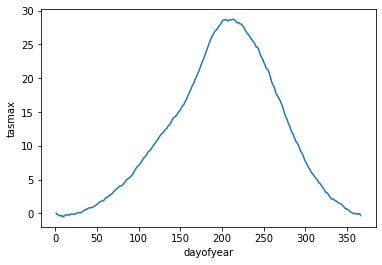

In [8]:
clim['tasmax'].plot()

In [12]:
clim['dayofyear'].values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
clim['tasmax'].values[59]

2.2515028

In [17]:
int(ds['time'][1033, 0].dt.day.values)

28

In [2]:
test1 = np.array([1,2,3])
test2 = np.array([4,5,6])

In [9]:
hello = np.stack([test1], axis=-1)

In [10]:
hello.shape

(3, 1)

In [11]:
hello

array([[1],
       [2],
       [3]])